In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

In [17]:
df = pd.read_csv('/Users/devyanshichandra/Downloads/train_df.csv')
eda_df = df.drop('FilePath', axis = 1)
eda_df

,Image Index,Patient ID,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,00000001_000.png,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111858,00030801_001.png,30801,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
111859,00030802_000.png,30802,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
111860,00030803_000.png,30803,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
111861,00030804_000.png,30804,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [18]:
cols = eda_df.columns
cols

Index(['Image Index', 'Patient ID', 'Cardiomegaly', 'Emphysema', 'Effusion',
       'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
       'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation'],
      dtype='object')

In [19]:
num = eda_df['Patient ID'].nunique()
num

30773

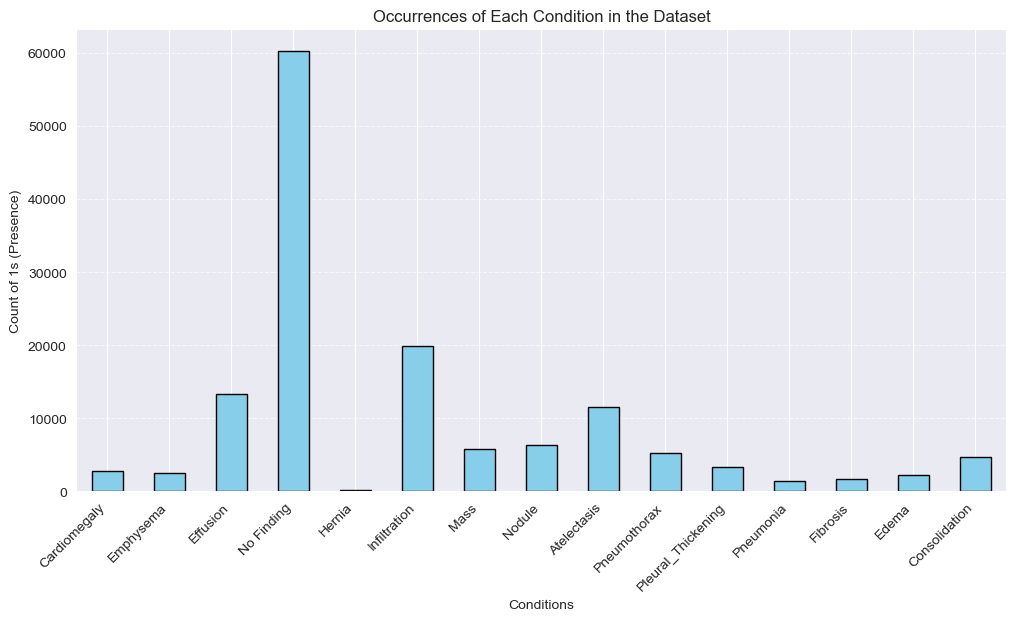

In [20]:
# graphing num of occurrences for each condition
graph1 = eda_df[['Cardiomegaly', 'Emphysema', 'Effusion', 'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis','Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
                 'Consolidation']]
value_counts = graph1.sum()
plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Conditions")
plt.ylabel("Count of 1s (Presence)")
plt.title("Occurrences of Each Condition in the Dataset")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

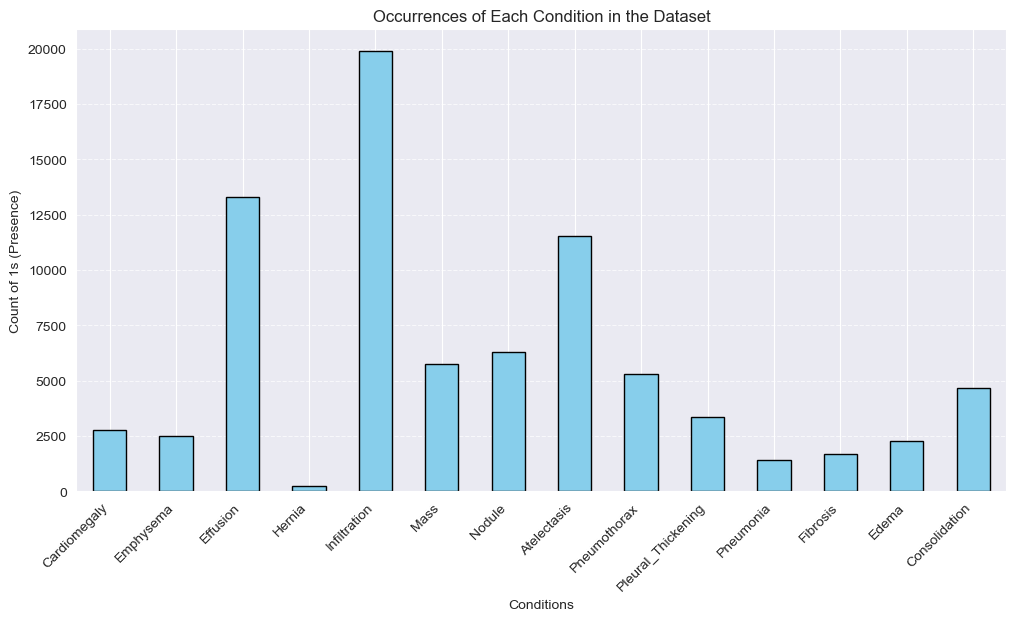

In [21]:
# removing no findings so other cols are more clear
disease_df = graph1.drop('No Finding', axis=1)
dis_counts = disease_df.sum()
plt.figure(figsize=(12, 6))
dis_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Conditions")
plt.ylabel("Count of 1s (Presence)")
plt.title("Occurrences of Each Condition in the Dataset")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

breakdown of our data, removed no finding class to see distribution of our conditions when an instance occurs. we have a high skew towards infiltration conditions, which requires balancing when entering our data into tensors

In [22]:
# how many times does no findings co occur with other conditions?
eda_df = eda_df.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
eda_df["No Finding"] = (eda_df.sum(axis=1) == 0).astype(int)
no_finding_with_others = eda_df[eda_df["No Finding"] == 1].drop(columns=["No Finding"])
co_occurrence_no_finding = no_finding_with_others.sum()

print(co_occurrence_no_finding)

Image Index           0
Patient ID            0
Cardiomegaly          0
Emphysema             0
Effusion              0
Hernia                0
Infiltration          0
Mass                  0
Nodule                0
Atelectasis           0
Pneumothorax          0
Pleural_Thickening    0
Pneumonia             0
Fibrosis              0
Edema                 0
Consolidation         0
dtype: int64


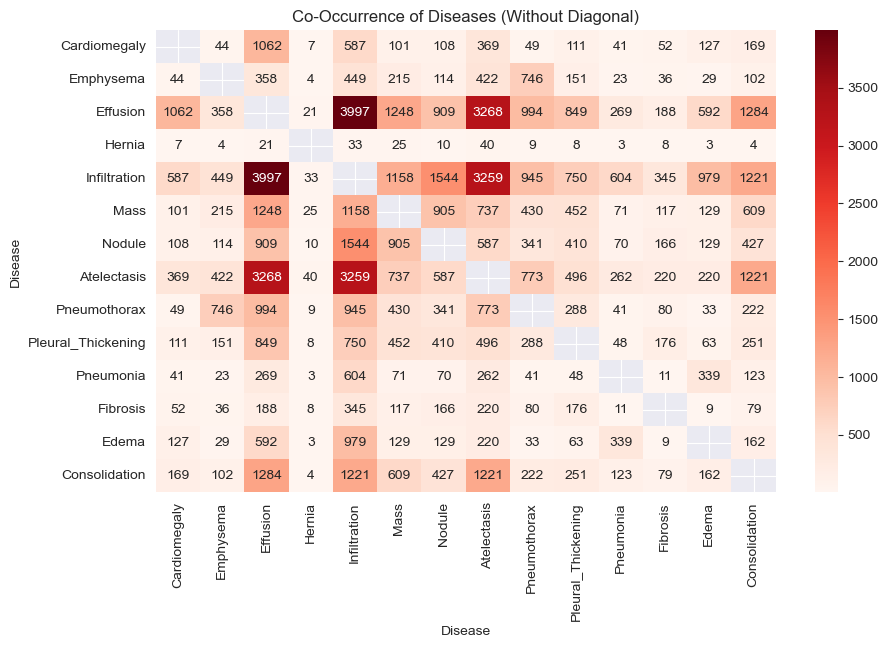

In [23]:
disease_df = disease_df.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
co_occurrence_disease = disease_df.T.dot(disease_df)
co_occurrence_disease = co_occurrence_disease.astype(float)

#ignoring overlapping cols, creating heat map
np.fill_diagonal(co_occurrence_disease.values, np.nan)
plt.figure(figsize=(10, 6))
sns.heatmap(co_occurrence_disease, annot=True, cmap="Reds", fmt=".0f", cbar=True, mask=np.isnan(co_occurrence_disease))

# Labeling
plt.title("Co-Occurrence of Diseases (Without Diagonal)")
plt.xlabel("Disease")
plt.ylabel("Disease")
plt.show()

In [24]:
co_occurrence_disease

,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
Cardiomegaly,NaN,44.0,1062.0,7.0,587.0,101.0,108.0,369.0,49.0,111.0,41.0,52.0,127.0,169.0
Emphysema,44.0,NaN,358.0,4.0,449.0,215.0,114.0,422.0,746.0,151.0,23.0,36.0,29.0,102.0
Effusion,1062.0,358.0,NaN,21.0,3997.0,1248.0,909.0,3268.0,994.0,849.0,269.0,188.0,592.0,1284.0
Hernia,7.0,4.0,21.0,NaN,33.0,25.0,10.0,40.0,9.0,8.0,3.0,8.0,3.0,4.0
Infiltration,587.0,449.0,3997.0,33.0,NaN,1158.0,1544.0,3259.0,945.0,750.0,604.0,345.0,979.0,1221.0
Mass,101.0,215.0,1248.0,25.0,1158.0,NaN,905.0,737.0,430.0,452.0,71.0,117.0,129.0,609.0
Nodule,108.0,114.0,909.0,10.0,1544.0,905.0,NaN,587.0,341.0,410.0,70.0,166.0,129.0,427.0
Atelectasis,369.0,422.0,3268.0,40.0,3259.0,737.0,587.0,NaN,773.0,496.0,262.0,220.0,220.0,1221.0
Pneumothorax,49.0,746.0,994.0,9.0,945.0,430.0,341.0,773.0,NaN,288.0,41.0,80.0,33.0,222.0
Pleural_Thickening,111.0,151.0,849.0,8.0,750.0,452.0,410.0,496.0,288.0,NaN,48.0,176.0,63.0,251.0


Infiltration seems to have the most overlap, however we have an influx of data for infiltration which makes sense that we see far more overlap for that condition with others. Infiltration x Ateclasis and Infiltration and Effusion have the most co-occurrences. Actelasis and Effusion also has significant overlap.

Each of these conditions affect the lungs, and involve either infection, inflammation, or fluid build up in the lungs or cavities surrounding it. Significant overlap for these conditions makes sense, as they can occur simultaneously in multiple conditions. Consolidation also has significant, not as common as those three conditions, but still significant overlap with each of these three conditions. This is the solidifaction of the fluid build up in chest cavities, and can occur simultaneously with each as previously seen in medical studies

In [49]:
G = nx.Graph()

for i in range(len(co_occurrence_disease.columns)):
    for j in range(i + 1, len(co_occurrence_disease.columns)):
        col_i = co_occurrence_disease.columns[i]
        col_j = co_occurrence_disease.columns[j]
        weight = co_occurrence_disease.at[col_i, col_j]
        # if co-occurrence greater than 750, a significant overlap
        if weight > 750:
            G.add_edge(col_i, col_j, weight=weight)
            G.add_edge(col_j, col_i, weight=weight)

44.0
1062.0
7.0
587.0
101.0
108.0
369.0
49.0
111.0
41.0
52.0
127.0
169.0
358.0
4.0
449.0
215.0
114.0
422.0
746.0
151.0
23.0
36.0
29.0
102.0
21.0
3997.0
1248.0
909.0
3268.0
994.0
849.0
269.0
188.0
592.0
1284.0
33.0
25.0
10.0
40.0
9.0
8.0
3.0
8.0
3.0
4.0
1158.0
1544.0
3259.0
945.0
750.0
604.0
345.0
979.0
1221.0
905.0
737.0
430.0
452.0
71.0
117.0
129.0
609.0
587.0
341.0
410.0
70.0
166.0
129.0
427.0
773.0
496.0
262.0
220.0
220.0
1221.0
288.0
41.0
80.0
33.0
222.0
48.0
176.0
63.0
251.0
11.0
339.0
123.0
9.0
79.0
162.0


In [50]:
import matplotlib.cm as cm

# plotting w edge weights to show relationships
pos = nx.spring_layout(G, seed=42)

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
norm = plt.Normalize(min(edge_weights), max(edge_weights))

cmap = cm.viridis
edge_colors = [cmap(norm(weight)) for weight in edge_weights]

# edge widths based off weight then minimized to fit graph
edge_widths = [(weight * 0.01) for weight in edge_weights]  # Multiply by a constant to scale edge width

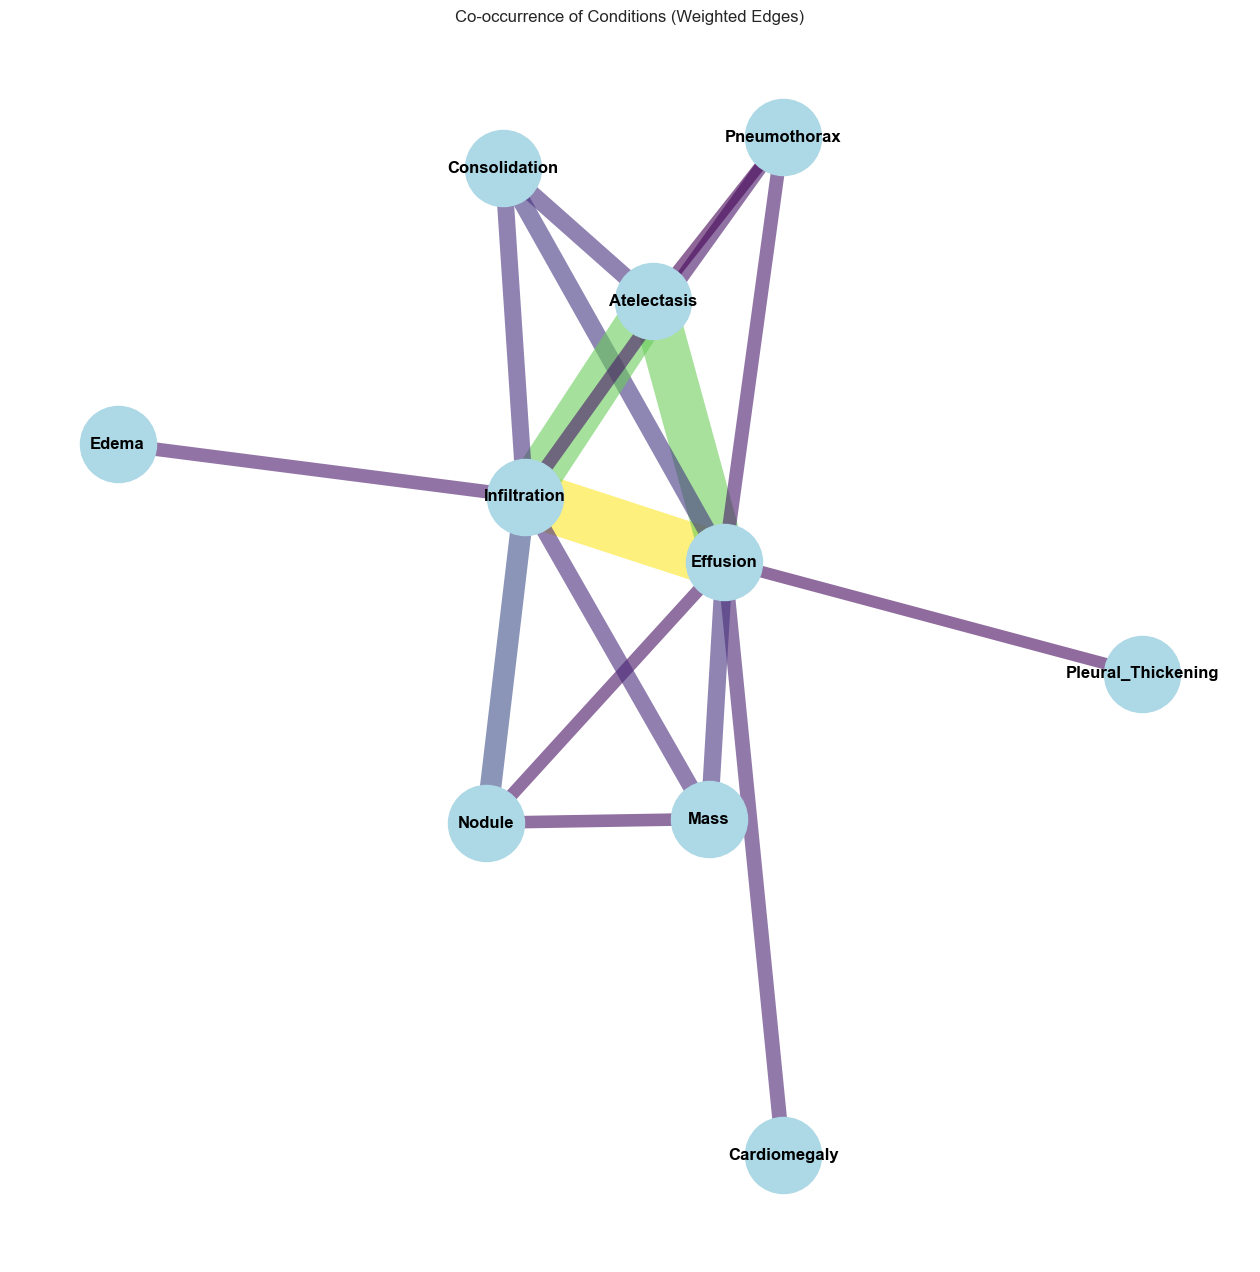

In [51]:
plt.figure(figsize=(16, 16))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

plt.title("Co-occurrence of Conditions (Weighted Edges)")
plt.axis('off')
plt.show()